In [1]:
import os

In [2]:
os.chdir("C:\\Users\\hr\\Downloads\\ML_Practice\\Kaggle_Competetions\\House Price Advanced Regression")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
train = pd.read_csv("C:\\Users\\hr\\Downloads\\ML_Practice\\Kaggle_Competetions\\House Price Advanced Regression\\Data\\train.csv")
test = pd.read_csv("C:\\Users\\hr\\Downloads\\ML_Practice\\Kaggle_Competetions\\House Price Advanced Regression\\Data\\test.csv")

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [13]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [15]:
total_train = np.product(train.shape)
train_missing = train.isnull().sum()
percent_train_missing = (train_missing/total_train)*100
percent_train_missing.sort_values(ascending=False)[1:60]

MiscFeature      1.188906
Alley            1.157619
Fence            0.996956
FireplaceQu      0.583460
LotFrontage      0.219009
GarageCond       0.068493
GarageType       0.068493
GarageYrBlt      0.068493
GarageFinish     0.068493
GarageQual       0.068493
BsmtExposure     0.032133
BsmtFinType2     0.032133
BsmtFinType1     0.031287
BsmtCond         0.031287
BsmtQual         0.031287
MasVnrArea       0.006765
MasVnrType       0.006765
Electrical       0.000846
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
LotConfig        0.000000
OverallCond      0.000000
OverallQual      0.000000
HouseStyle       0.000000
BldgType         0.000000
Condition2       0.000000
BsmtFinSF1       0.000000
MSZoning         0.000000
LotArea          0.000000
Street      

In [16]:
total_test = np.product(test.shape)
test_missing = test.isnull().sum()
percent_test_missing = (test_missing/total_test)*100
percent_test_missing.sort_values(ascending=False)[1:60]

MiscFeature      1.206306
Alley            1.158328
Fence            1.001542
FireplaceQu      0.625428
LotFrontage      0.194483
GarageCond       0.066827
GarageQual       0.066827
GarageYrBlt      0.066827
GarageFinish     0.066827
GarageType       0.065113
BsmtCond         0.038554
BsmtQual         0.037697
BsmtExposure     0.037697
BsmtFinType1     0.035984
BsmtFinType2     0.035984
MasVnrType       0.013708
MasVnrArea       0.012851
MSZoning         0.003427
BsmtHalfBath     0.001714
Utilities        0.001714
Functional       0.001714
BsmtFullBath     0.001714
BsmtFinSF2       0.000857
BsmtFinSF1       0.000857
Exterior2nd      0.000857
BsmtUnfSF        0.000857
TotalBsmtSF      0.000857
SaleType         0.000857
Exterior1st      0.000857
KitchenQual      0.000857
GarageArea       0.000857
GarageCars       0.000857
HouseStyle       0.000000
LandSlope        0.000000
MSSubClass       0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour 

In [17]:
pred_train = train.drop(['SalePrice'],axis=1)
target_train = train['SalePrice']
pred_test=test

In [18]:
pred_train.shape

(1460, 80)

In [19]:
target_train.shape

(1460,)

In [20]:
pred_test.shape

(1459, 80)

In [21]:
pred_train.dtypes[:60]

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir      

In [22]:
pred_train.dtypes[61:80]

GarageCars        int64
GarageArea        int64
GarageQual       object
GarageCond       object
PavedDrive       object
WoodDeckSF        int64
OpenPorchSF       int64
EnclosedPorch     int64
3SsnPorch         int64
ScreenPorch       int64
PoolArea          int64
PoolQC           object
Fence            object
MiscFeature      object
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
dtype: object

In [23]:
target_train.dtypes

dtype('int64')

In [24]:
pred_train.dtypes[0:60]

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir      

In [25]:
pred_train.dtypes[61:80]

GarageCars        int64
GarageArea        int64
GarageQual       object
GarageCond       object
PavedDrive       object
WoodDeckSF        int64
OpenPorchSF       int64
EnclosedPorch     int64
3SsnPorch         int64
ScreenPorch       int64
PoolArea          int64
PoolQC           object
Fence            object
MiscFeature      object
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
dtype: object

In [26]:
target_train.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [27]:
pred_train.groupby(['YrSold']).size()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
dtype: int64

In [28]:
pred_train.groupby(['MoSold']).size()

MoSold
1      58
2      52
3     106
4     141
5     204
6     253
7     234
8     122
9      63
10     89
11     79
12     59
dtype: int64

In [29]:
 pred_train.groupby(['HouseStyle']).size()

HouseStyle
1.5Fin    154
1.5Unf     14
1Story    726
2.5Fin      8
2.5Unf     11
2Story    445
SFoyer     37
SLvl       65
dtype: int64

In [30]:
correlation = train.corr(method = 'pearson')
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [31]:
train.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [32]:
test.skew()

Id                0.000000
MSSubClass        1.346690
LotFrontage       0.661921
LotArea           3.115217
OverallQual       0.181196
OverallCond       0.449165
YearBuilt        -0.587657
YearRemodAdd     -0.399906
MasVnrArea        2.533377
BsmtFinSF1        1.165677
BsmtFinSF2        4.041345
BsmtUnfSF         0.919916
TotalBsmtSF       0.813589
1stFlrSF          1.558195
2ndFlrSF          0.912883
LowQualFinSF     16.167254
GrLivArea         1.130402
BsmtFullBath      0.649698
BsmtHalfBath      3.779866
FullBath          0.295839
HalfBath          0.714728
BedroomAbvGr      0.436623
KitchenAbvGr      4.079055
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
GarageYrBlt      -0.158363
GarageCars       -0.107142
GarageArea        0.300239
WoodDeckSF        2.130760
OpenPorchSF       2.687779
EnclosedPorch     4.669172
3SsnPorch        12.524216
ScreenPorch       3.788244
PoolArea         20.196888
MiscVal          20.075188
MoSold            0.183022
YrSold            0.168986
d

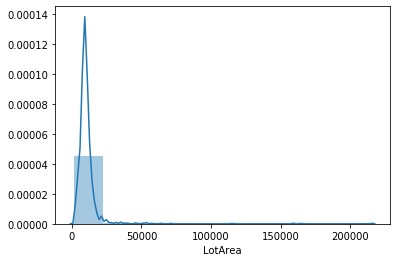

In [33]:
sns.distplot(pred_train['LotArea'],bins=10, kde=True)

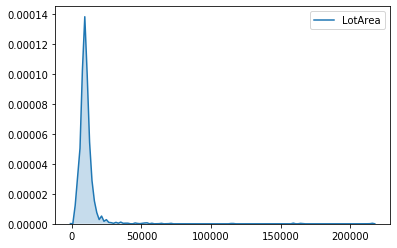

In [34]:
sns.kdeplot(pred_train['LotArea'], shade=True)

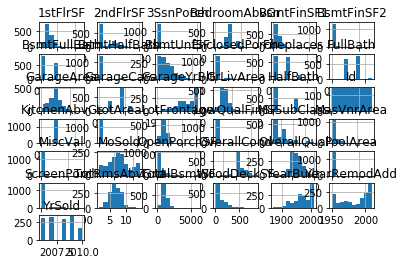

In [36]:
pred_train.hist()
plt.show()

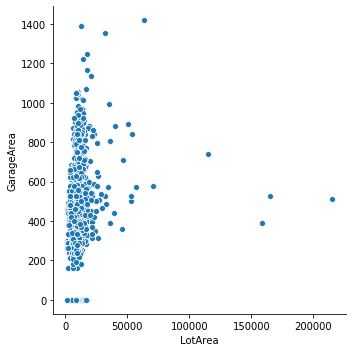

In [38]:
sns.relplot(x='LotArea', y='GarageArea', data=pred_train, kind='scatter')

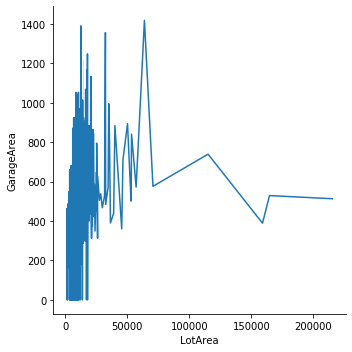

In [39]:
sns.relplot(x='LotArea', y='GarageArea', data=pred_train, kind='line')

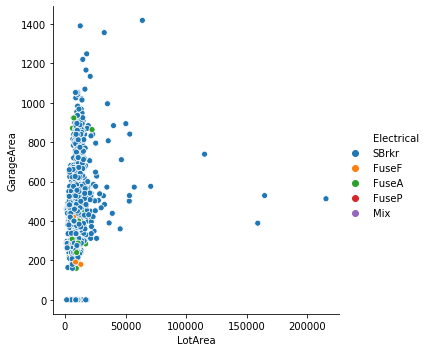

In [40]:
sns.relplot(x='LotArea', y='GarageArea', data=pred_train, kind='scatter',hue='Electrical')

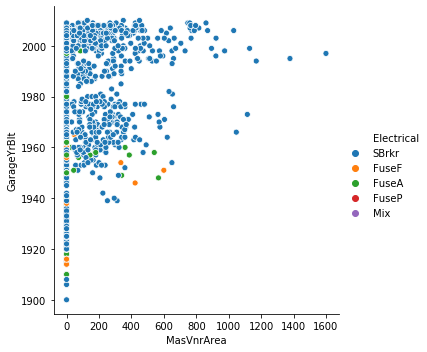

In [42]:
sns.relplot(x='MasVnrArea', y='GarageYrBlt', data=pred_train, kind='scatter',hue='Electrical')

In [46]:
n=15
top15_cols=correlation.nlargest(n,'SalePrice')['SalePrice'].index
print(top15_cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')


In [48]:
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [50]:
sns.set(style='darkgrid')

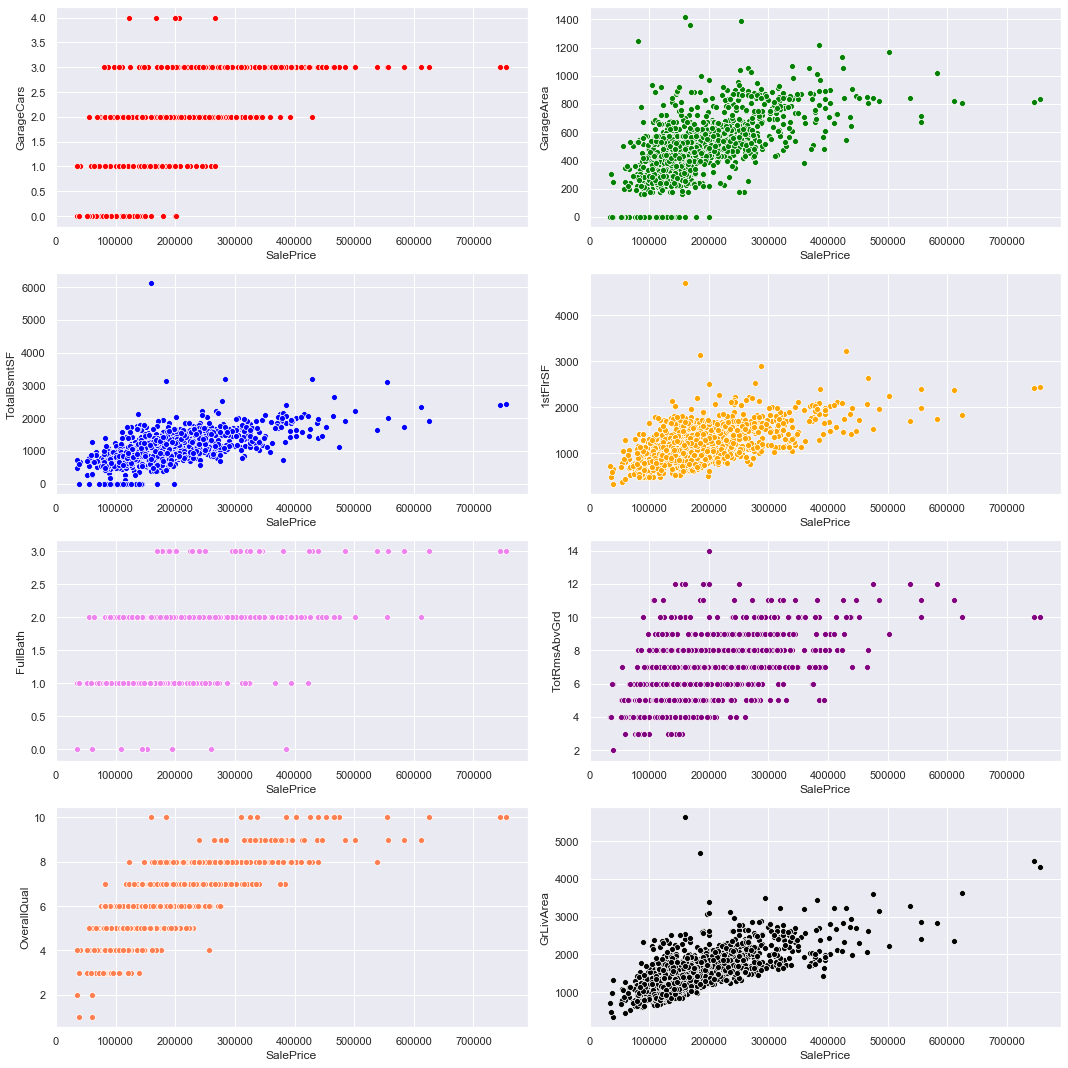

In [61]:
fig, ax = plt.subplots(4,2,figsize=(15,15))
sns.scatterplot(x='SalePrice',y='GarageCars', data = train, color = 'red', ax=ax[0][0])
sns.scatterplot(x='SalePrice',y='GarageArea', data = train, color = 'green', ax=ax[0][1])
sns.scatterplot(x = 'SalePrice', y='TotalBsmtSF', data = train, color = 'blue', ax=ax[1][0])
sns.scatterplot(x = 'SalePrice', y='1stFlrSF', data = train, color = 'orange', ax=ax[1][1])
sns.scatterplot(x='SalePrice', y='FullBath', data=train, color = 'violet', ax=ax[2][0])
sns.scatterplot(x='SalePrice', y='TotRmsAbvGrd', data=train, color = 'purple', ax=ax[2][1])
sns.scatterplot(x='SalePrice', y='OverallQual', data = train, color = 'coral', ax = ax[3][0])
sns.scatterplot(x='SalePrice', y='GrLivArea', data=train, color='black', ax = ax[3][1])
fig.tight_layout()

In [62]:
train_n1=pred_train.drop(['GarageCars','TotalBsmtSF','TotRmsAbvGrd'],axis=1)
test_n1=pred_test.drop(['GarageCars','TotalBsmtSF','TotRmsAbvGrd'],axis=1)

KeyError: 'TotalBsmtSF'

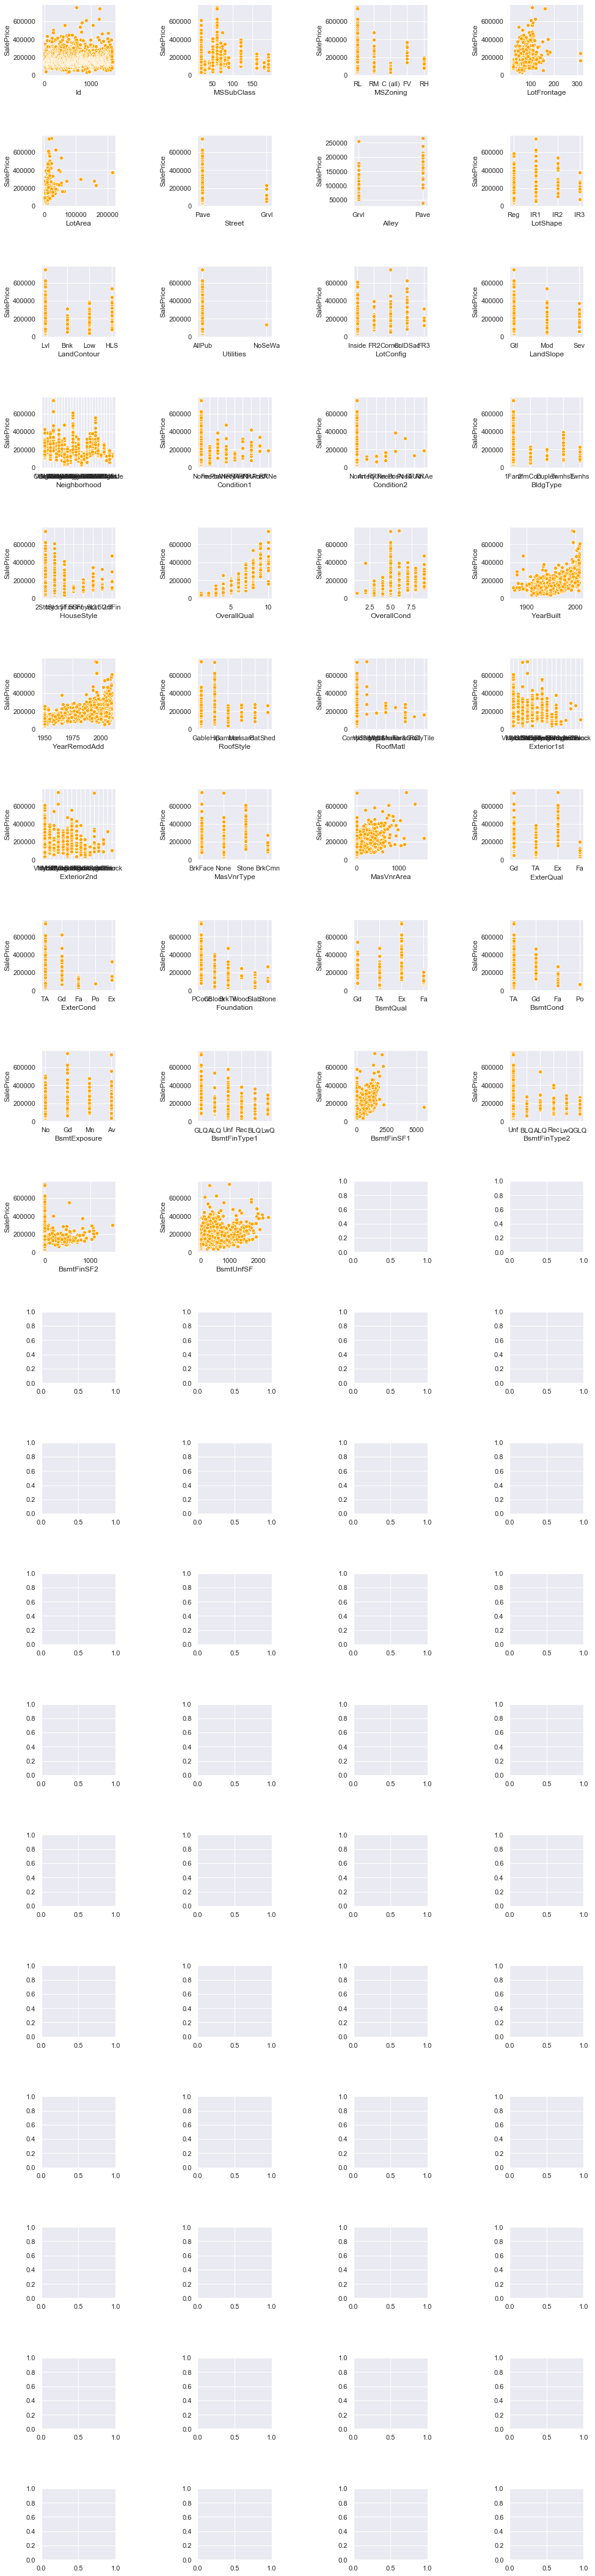

In [65]:
fig, ax = plt.subplots(20,4, figsize = (15,60))
def graph(x,y,r,c,title):
    sns.scatterplot(train_n1[x],y,color='orange',ax = ax[r][c])
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)
for r,col in enumerate(train.columns):
    c=r%4
    graph(col, train['SalePrice'], r//4,c,col)

In [70]:
non_linear=['MSSubClass','LotArea','OverallCond','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','MoSold', 'YrSold', 'Id']
print("total non-linear",len(non_linear)," columns")

total non-linear 18  columns


In [71]:
linear_features=np.array([col for col in train_n1.columns if col not in non_linear])

In [72]:
linear_features

array(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'], dtype='<U13')

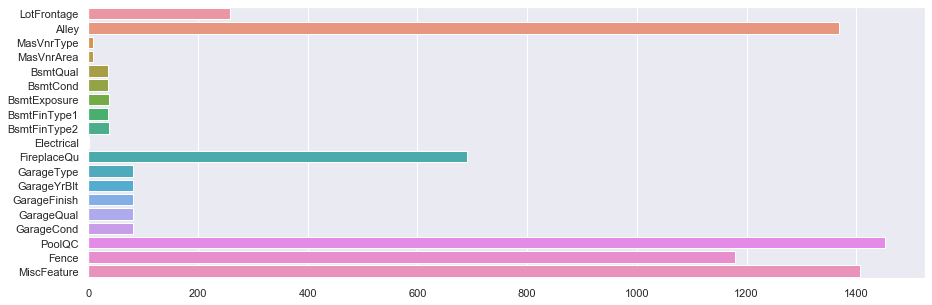

In [73]:
# sns.set(style="whitegrid")
fig=plt.figure(figsize=(15,5))
train_null=train_n1.isnull().sum()[train_n1.isnull().sum()!=0]
sns.barplot(y=train_null.index,x=train_null)

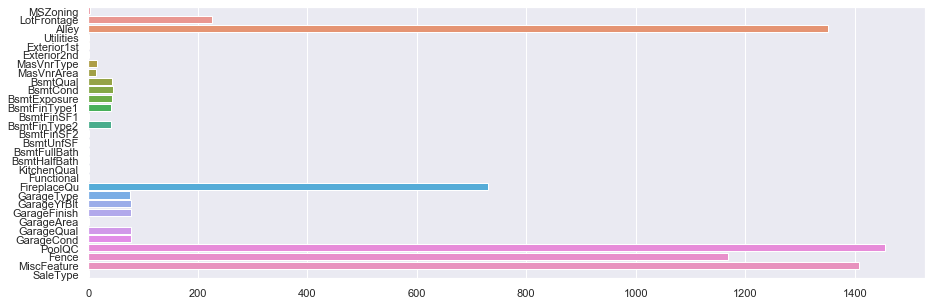

In [74]:
# sns.set(style="whitegrid")
fig=plt.figure(figsize=(15,5))
test_null=test_n1.isnull().sum()[test_n1.isnull().sum()!=0]
sns.barplot(y=test_null.index,x=test_null)

In [75]:
train_n1['GarageYrBlt']=train_n1['GarageYrBlt'].fillna(train_n1['GarageYrBlt'].median())
test_n1['GarageYrBlt']=test_n1['GarageYrBlt'].fillna(test_n1['GarageYrBlt'].median())

for col in train_n1.columns:
    train_n1[col] = train_n1[col].fillna(0)
for col in test_n1.columns:
    test_n1[col] = test_n1[col].fillna(0)

In [76]:
print(train_n1[linear_features].shape)
print(test_n1[linear_features[:-1]].shape)

(1460, 59)
(1459, 58)


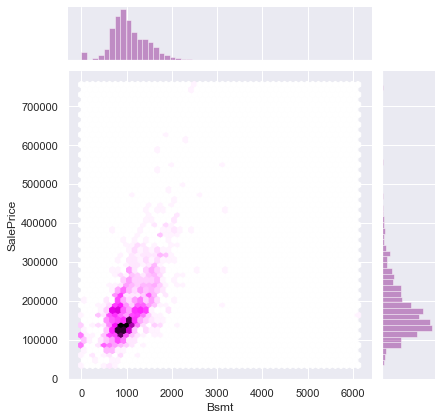

In [81]:
train_n1['Bsmt']=train_n1['BsmtFinSF1']+train_n1['BsmtFinSF2']+train_n1['BsmtUnfSF']
test_n1['Bsmt']=test_n1['BsmtFinSF1']+test_n1['BsmtFinSF2']+test_n1['BsmtUnfSF']
sns.jointplot(train_n1['Bsmt'],target_train,kind='hex',color='purple')

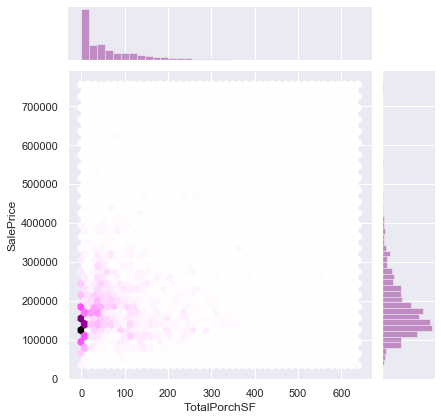

In [83]:
train_n1['TotalPorchSF']=train_n1['EnclosedPorch']+train_n1['OpenPorchSF']
test_n1['TotalPorchSF']=test_n1['EnclosedPorch']+test_n1['OpenPorchSF']

sns.jointplot(train_n1['TotalPorchSF'],target_train,kind='hex',color='purple')

In [85]:
linear_features=['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd','MasVnrArea','Bsmt', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt','GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']
train_n1[linear_features].columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'Bsmt', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'],
      dtype='object')

In [86]:
train_n1[linear_features].shape

(1460, 13)

In [87]:
test_n1[linear_features].shape

(1459, 13)

In [91]:
def graph(x,y,r,c,title,line):
    sns.scatterplot(train_n1[x],target_train,color=('orange'),ax=ax[r][c])
    sns.lineplot(x=line,y=target_train,color='red',ax=ax[r][c])
    ax[r][c].set_ylabel(y)
    ax[r][c].set_xlabel(x)
    fig.tight_layout(pad=5.0)

out=[300,1200,12000,4600,1200]
for r,col in enumerate(np.array(['LotFrontage','MasVnrArea','Bsmt','GrLivArea','GarageArea'])):
    c=r%2
    graph(col,'SalePrice',r//2,c,col,out[r])

In [93]:
a=train_n1['LotFrontage'].sort_values(ascending=False).head(2)
b=train_n1['MasVnrArea'].sort_values(ascending=False).head(2)
c=train_n1['Bsmt'].sort_values(ascending=False).head(1)
d=train_n1['GrLivArea'].sort_values(ascending=False).head(2)
e=train_n1['GarageArea'].sort_values(ascending=False).head(3)
f=target_train.sort_values(ascending=False).head(2)

In [94]:
index=a.index
index=index.append(b.index)
index=index.append(c.index)
index=index.append(d.index)
index=index.append(e.index)
index=index.append(f.index)

In [95]:
train_n1=train_n1.drop(index).reset_index(drop=True)

In [96]:
target_train = target_train.drop(index).reset_index(drop=True)

In [97]:
print(train_n1.shape)
print(train_n1[linear_features].shape)

(1451, 79)
(1451, 13)


In [98]:
Train_X_n=train_n1[linear_features]
Train_Y_n=target_train

In [99]:
Train_X_n.skew()

LotFrontage     -0.304896
OverallQual      0.178474
YearBuilt       -0.608484
YearRemodAdd    -0.496830
MasVnrArea       2.300035
Bsmt             0.483762
2ndFlrSF         0.766328
GrLivArea        0.811428
GarageYrBlt     -0.674187
GarageArea       0.047691
WoodDeckSF       1.555968
OpenPorchSF      2.339160
EnclosedPorch    3.077668
dtype: float64

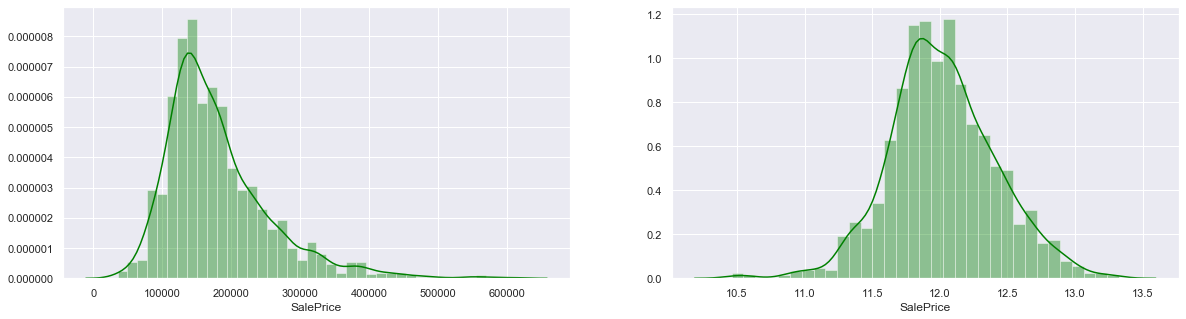

In [100]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(Train_Y_n,ax=ax[0],color='green')
sns.distplot(np.log1p(Train_Y_n),ax=ax[1],color='green')
# fig.tight_layout()

In [101]:
y_train=np.log1p(Train_Y_n)

In [103]:
# scaler=StandardScaler()
from sklearn.preprocessing import StandardScaler,RobustScaler
scaler=RobustScaler()
final_train_n=pd.DataFrame(scaler.fit_transform(Train_X_n),columns=Train_X_n.columns)
final_test_n=pd.DataFrame(scaler.fit_transform(test_n1[linear_features]),columns=Train_X_n.columns)

In [104]:
final_train_n.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Bsmt,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,0.054795,0.5,0.673913,0.263158,1.209877,-0.269618,1.173077,0.394104,0.589744,0.281690,0.000000,0.544118,0.0
1,0.465753,0.0,0.086957,-0.447368,0.000000,0.547284,0.000000,-0.301009,-0.102564,-0.072435,1.773810,-0.352941,0.0
2,0.136986,0.5,0.630435,0.236842,1.000000,-0.140845,1.189560,0.512025,0.538462,0.523139,0.000000,0.264706,0.0
3,-0.082192,0.5,-1.239130,-0.605263,0.000000,-0.470825,1.038462,0.404965,0.461538,0.659960,0.000000,0.161765,272.0
4,0.575342,1.0,0.608696,0.184211,2.160494,0.311871,1.446429,1.151280,0.512821,1.440644,1.142857,0.882353,0.0


In [105]:
final_test_n.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Bsmt,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,0.500000,-0.5,-0.250000,-0.756098,0.000000,-0.203846,0.000000,-0.888152,-0.444444,0.967118,0.833333,-0.388889,0.0
1,0.529412,0.0,-0.312500,-0.829268,0.666667,0.655769,0.000000,-0.170671,-0.518519,-0.649903,2.339286,0.111111,0.0
2,0.323529,-0.5,0.500000,0.146341,0.000000,-0.115385,1.036982,0.326429,0.444444,0.007737,1.261905,0.083333,0.0
3,0.441176,0.0,0.520833,0.146341,0.123457,-0.119231,1.002959,0.285004,0.469136,-0.038685,2.142857,0.111111,0.0
4,-0.588235,1.0,0.395833,0.000000,0.000000,0.561538,0.000000,-0.251864,0.320988,0.100580,0.000000,0.750000,0.0


In [106]:
train_c=train[[c for c in train.columns if train[c].dtypes=='O']].copy()
test_c=test[[c for c in test.columns if test[c].dtypes=='O']].copy()

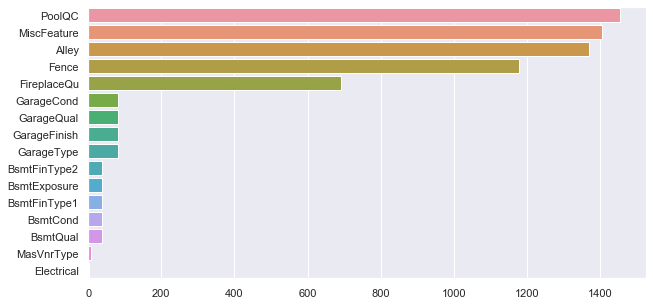

In [107]:
# print(train_c.shape)
fig=plt.figure(figsize=(10,5))
train_null=train_c.isnull().sum()[train_c.isnull().sum()!=0].sort_values(ascending=False)
sns.barplot(y=train_null.index,x=train_null)

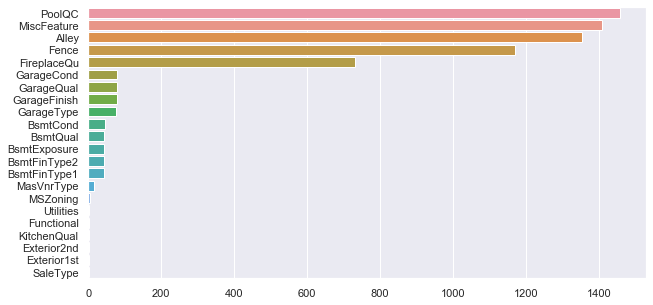

In [108]:
fig=plt.figure(figsize=(10,5))
test_null=test_c.isnull().sum()[test_c.isnull().sum()!=0].sort_values(ascending=False)
sns.barplot(y=test_null.index,x=test_null)

In [109]:
train_c.dropna(thresh=len(train_c)*0.9,axis=1,inplace=True)

In [110]:
test_c.dropna(thresh=len(test_c)*0.9,axis=1,inplace=True)

In [111]:
train_c['Electrical']=train_c['Electrical'].fillna(method='ffill')
test_c['SaleType']=test_c['SaleType'].fillna(method='ffill')
test_c['KitchenQual']=test_c['KitchenQual'].fillna(method='ffill')
test_c['Exterior1st']=test_c['Exterior1st'].fillna(method='ffill')
test_c['Exterior2nd']=test_c['Exterior2nd'].fillna(method='ffill')
test_c['Functional']=test_c['Functional'].fillna(method='ffill')
test_c['Utilities']=test_c['Utilities'].fillna(method='ffill')
test_c['MSZoning']=test_c['MSZoning'].fillna(method='ffill')

In [112]:
for col in train_c.columns:
    train_c[col] = train_c[col].fillna("None")
for col in test_c.columns:
    test_c[col] = test_c[col].fillna("None")

In [113]:
print("Train null values : ",len(train_c.isnull().sum()[train_c.isnull().sum()!=0]))
print("Test null values : ",len(test_c.isnull().sum()[test_c.isnull().sum()!=0]))

Train null values :  0
Test null values :  0


In [114]:
train_c=train_c.drop(index).reset_index(drop=True)
train_c.shape

(1451, 38)

In [115]:
test_c.shape

(1459, 38)

In [116]:
num_train=train_n1[['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr','BedroomAbvGr','Fireplaces','MoSold','YrSold']]
num_test=test_n1[['OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','KitchenAbvGr','BedroomAbvGr','Fireplaces','MoSold','YrSold']]
print(num_train.shape)
print(num_test.shape)
numerical_categorical_feature=c = pd.concat((num_train,num_test),sort=False)
print(numerical_categorical_feature.shape)
numerical_categorical_feature=numerical_categorical_feature.astype('O')

(1451, 10)
(1459, 10)
(2910, 10)


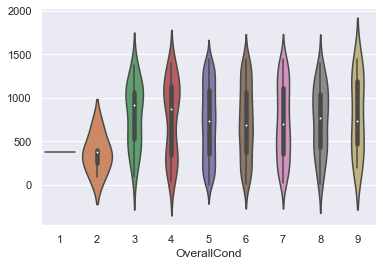

In [117]:
sns.violinplot(x=num_train['OverallCond'],y=num_train['OverallCond'].index)

In [118]:
numerical_categorical_feature=pd.get_dummies(numerical_categorical_feature)
num_train_dummy=numerical_categorical_feature[:1451]
num_test_dummy=numerical_categorical_feature[1451:].reset_index(drop=True)
print(num_train_dummy.shape)
print(num_test_dummy.shape)

(1451, 58)
(1459, 58)


In [119]:
c = pd.concat((train_c, test_c), sort=False).reset_index(drop=True)

In [120]:
c1=pd.get_dummies(c)

In [121]:
final_train_c=c1.iloc[:train_c.shape[0]]
# final_train_c=final_train_c.drop(index).reset_index(drop=True)
final_train_c.shape

(1451, 242)

In [122]:
final_test_c=c1.iloc[train_c.shape[0]:]
final_test_c=final_test_c.reset_index(drop=True)
final_test_c.shape

(1459, 242)

In [123]:
final_train_c=final_train_c.merge(num_train_dummy,left_index=True,right_index=True)
final_test_c=final_test_c.merge(num_test_dummy,left_index=True,right_index=True)

In [126]:
from sklearn import preprocessing
train_c_labeled=pd.DataFrame()
test_c_labeled=pd.DataFrame()

for col in train_c.columns:
    le = preprocessing.LabelEncoder()
    train_c_labeled[col]=le.fit_transform(train_c[col])
    test_c_labeled[col]=le.fit_transform(test_c[col])

In [127]:
test_c_labeled

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,3,3,6,1,3,4,5,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,3,2,6,1,3,4,5,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,3,3,6,1,0,4,5,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,3,2,6,1,0,4,5,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,3,2,6,1,2,4,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,...,3,3,6,6,1,2,3,2,8,4
1455,4,1,3,3,0,4,0,10,2,2,...,3,3,6,4,3,4,5,2,8,0
1456,3,1,3,3,0,4,0,11,2,2,...,3,3,6,5,3,4,5,2,8,0
1457,3,1,3,3,0,4,0,11,2,2,...,3,3,6,6,1,2,3,2,8,4


In [128]:
final_test_n

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Bsmt,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,0.500000,-0.5,-0.250000,-0.756098,0.000000,-0.203846,0.000000,-0.888152,-0.444444,0.967118,0.833333,-0.388889,0.0
1,0.529412,0.0,-0.312500,-0.829268,0.666667,0.655769,0.000000,-0.170671,-0.518519,-0.649903,2.339286,0.111111,0.0
2,0.323529,-0.5,0.500000,0.146341,0.000000,-0.115385,1.036982,0.326429,0.444444,0.007737,1.261905,0.083333,0.0
3,0.441176,0.0,0.520833,0.146341,0.123457,-0.119231,1.002959,0.285004,0.469136,-0.038685,2.142857,0.111111,0.0
4,-0.588235,1.0,0.395833,0.000000,0.000000,0.561538,0.000000,-0.251864,0.320988,0.100580,0.000000,0.750000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.235294,-1.0,-0.062500,-0.536585,0.000000,-0.850000,0.807692,-0.563380,0.000000,-1.856867,0.000000,-0.388889,0.0
1455,-1.235294,-1.0,-0.062500,-0.536585,0.000000,-0.850000,0.807692,-0.563380,-0.222222,-0.750484,0.000000,-0.055556,0.0
1456,2.852941,-0.5,-0.270833,0.097561,0.000000,0.453846,0.000000,-0.344656,-0.469136,0.371373,2.821429,-0.388889,0.0
1457,-0.029412,-0.5,0.395833,0.000000,0.000000,-0.146154,0.000000,-0.765534,0.000000,-1.856867,0.476190,0.055556,0.0


In [129]:
x_train=final_train_n.merge(final_train_c,left_index=True,right_index=True).reset_index(drop=True)
x_test=final_test_n.merge(final_test_c,left_index=True,right_index=True).reset_index(drop=True)

In [130]:
x_train_xgb=final_train_n.merge(train_c_labeled,left_index=True,right_index=True).reset_index(drop=True)
x_test_xgb=final_test_n.merge(test_c_labeled,left_index=True,right_index=True).reset_index(drop=True)

In [131]:
print(x_train.shape)
print(x_test.shape)
print(x_train_xgb.shape)
print(x_test_xgb.shape)

(1451, 313)
(1459, 313)
(1451, 51)
(1459, 51)


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train,test_size = .3, random_state=10)

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge=Ridge()
parameters= {'alpha':[x for x in [0.1,0.2,0.4,0.5,0.7,0.8,1]]}

ridge_reg=GridSearchCV(ridge, param_grid=parameters)
ridge_reg.fit(X_train,Y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)

C:\Users\hr\anaconda_new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The best value of Alpha is:  {'alpha': 1}


In [141]:
ridge_mod=Ridge(alpha=1)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(X_train)
y_pred_test=ridge_mod.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 

Root Mean Square Error train = 0.09442029355745506
Root Mean Square Error test = 0.09100921911129814


In [142]:
from sklearn.linear_model import Lasso

Lasso_reg =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,1]]}

Lasso_reg=GridSearchCV(Lasso_reg, param_grid=parameters)
Lasso_reg.fit(X_train,Y_train)
print("The best value of Alpha is: ",Lasso_reg.best_params_,Lasso_reg.best_score_)

C:\Users\hr\anaconda_new\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


The best value of Alpha is:  {'alpha': 0.0005} 0.90699420335852


In [144]:
Lasso_reg =Lasso(alpha=0.0005)
Lasso_reg.fit(x_train,y_train)
y_pred_train=Lasso_reg.predict(X_train)
y_pred_test=Lasso_reg.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 

Root Mean Square Error train = 0.10378076847756172
Root Mean Square Error test = 0.09659054200608624


In [145]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
params = {"max_depth":[20,20,20], "n_estimators":[27,30,33]}
rf_reg = GridSearchCV(rf, params, cv = 15, n_jobs =10)
rf_reg.fit(X_train, Y_train)
print(rf_reg.best_estimator_)
best_estimator=rf_reg.best_estimator_
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(Y_train, y_pred_train))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(Y_test, y_pred_test)))) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=33,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Root Mean Square Error train = 0.05914420716089515
Root Mean Square Error test = 0.14289897790998338


In [146]:
X_train_xgb, X_test_xgb, Y_train_xgb, Y_test_xgb = train_test_split(x_train_xgb,y_train,test_size = 0.2, random_state=25)

In [152]:
from sklearn.xgboost import XGBRegressor

ModuleNotFoundError: No module named 'sklearn.xgboost'

In [153]:
y_test=ridge_mod.predict(x_test)

In [154]:
final_y_test=np.expm1(y_test)

In [155]:
final_y_test

array([120931.54645474, 158393.85865852, 180545.35060096, ...,
       160246.31536444, 118993.85838714, 216814.31839216])

In [157]:
sample=pd.read_csv('C:\\Users\\hr\\Downloads\\ML_Practice\\Kaggle_Competetions\\House Price Advanced Regression\\Data\\sample_submission.csv')
submission=pd.DataFrame({"Id":sample['Id'], "SalePrice":final_y_test})
submission.to_csv('submission.csv',index=False)

In [158]:
submission.head()

,Id,SalePrice
0,1461,120931.546455
1,1462,158393.858659
2,1463,180545.350601
3,1464,200187.182524
4,1465,189962.853431
